<a href="https://colab.research.google.com/github/srJboca/segmentacion/blob/main/1.%20Exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Exploración de Datos de Clientes y Facturación de Gas

## Introducción

Bienvenido a este tutorial sobre exploración de datos. Trabajaremos con un conjunto de datos que simula la información de una empresa de distribución de gas. El objetivo es limpiar, combinar y explorar estos datos para entender mejor a los clientes, sus consumos y comportamientos de pago. Este proceso es fundamental antes de realizar tareas más avanzadas como la segmentación de clientes, modelado predictivo de consumo o análisis de morosidad.

Los datos se dividen en cuatro archivos:
1.  `clientes.parquet`: Información sobre los clientes (contratos, datos demográficos).
2.  `facturas.parquet`: Detalles de las facturas emitidas (consumo, fechas).
3.  `precios_gas.parquet`: Precios del gas por m³ según estrato, año y mes.
4.  `recaudo.parquet`: Información sobre los pagos realizados de las facturas.

## Fase 1: Configuración del Entorno y Carga de Datos

### 1.1 Importación de Librerías

Primero, importaremos las librerías necesarias.
* `pandas` para la manipulación y análisis de datos.
* `matplotlib.pyplot` y `seaborn` para la visualización de datos.
* `warnings` para gestionar las advertencias que puedan surgir.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Configuraciones para visualizaciones
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### 1.2 Descarga de los Archivos de Datos

Descargaremos los archivos Parquet desde el repositorio de GitHub.

In [ ]:
!wget -N https://github.com/srJboca/segmentacion/raw/refs/heads/main/archivos/clientes.parquet
!wget -N https://github.com/srJboca/segmentacion/raw/refs/heads/main/archivos/facturas.parquet
!wget -N https://github.com/srJboca/segmentacion/raw/refs/heads/main/archivos/precios_gas.parquet
!wget -N https://github.com/srJboca/segmentacion/raw/refs/heads/main/archivos/recaudo.parquet

### 1.3 Carga de Datos en DataFrames de Pandas

Ahora, cargaremos cada archivo Parquet en un DataFrame de Pandas.

In [4]:
df_clientes = pd.read_parquet('clientes.parquet')
df_facturas = pd.read_parquet('facturas.parquet')
df_recaudo = pd.read_parquet('recaudo.parquet')
df_precios_gas = pd.read_parquet('precios_gas.parquet')

## Fase 2: Inspección Inicial de los Datos

Realizaremos una inspección básica de cada DataFrame para entender su estructura, tipos de datos, y verificar la presencia de valores nulos o estadísticas descriptivas iniciales.

### 2.1 DataFrame de Clientes (`df_clientes`)

In [5]:
print("--- Información de df_clientes ---")
df_clientes.info()
print("\n--- Primeras 5 filas de df_clientes ---")
print(df_clientes.head())
print("\n--- Valores nulos en df_clientes ---")
print(df_clientes.isnull().sum())
print("\n--- Estadísticas descriptivas de df_clientes ---")
print(df_clientes.describe(include='all'))
print("\n--- Conteo de valores únicos por columna en df_clientes ---")
for col in df_clientes.columns:
    print(f"Columna '{col}': {df_clientes[col].nunique()} valores únicos")

--- Información de df_clientes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Numero de contrato                     50000 non-null  object
 1   Nombre                                 50000 non-null  object
 2   Direccion                              50000 non-null  object
 3   Ciudad                                 50000 non-null  object
 4   Estrato socioeconomico                 50000 non-null  object
 5   Fecha de Inicio del contrato           50000 non-null  object
 6   Fecha de la Ultima revision periodica  50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB

--- Primeras 5 filas de df_clientes ---
                     Numero de contrato                 Nombre  \
0  ba70b7fa-aef4-492a-9d45-13a0c63ce47c      Nancy López Gómez   
1  ee662451-3660-4026-8ca0-497a05a6a141  

**Observaciones sobre `df_clientes`:**
* Contiene información personal y contractual de los clientes.
* Columnas como `Ciudad` y `Estrato socioeconomico` son categóricas y podrían ser importantes para la segmentación.
* Las fechas están como objetos, necesitaremos convertirlas a tipo `datetime`.
* `Numero de contrato` parece ser el identificador único.

### 2.2 DataFrame de Facturas (`df_facturas`)

In [6]:
print("--- Información de df_facturas ---")
df_facturas.info()
print("\n--- Primeras 5 filas de df_facturas ---")
print(df_facturas.head())
print("\n--- Valores nulos en df_facturas ---")
print(df_facturas.isnull().sum())
print("\n--- Estadísticas descriptivas de df_facturas ---")
print(df_facturas.describe(include='all'))
print("\n--- Conteo de valores únicos por columna en df_facturas ---")
for col in df_facturas.columns:
    print(f"Columna '{col}': {df_facturas[col].nunique()} valores únicos")

--- Información de df_facturas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Numero de factura             object 
 1   Numero de contrato            object 
 2   Año                           int64  
 3   Mes                           int64  
 4   Fecha de Emision              object 
 5   Consumo (m3)                  float64
 6   Fecha de Pago Oportuno        object 
 7   Fecha de Lectura              object 
 8   Fecha de Suspension Estimada  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 206.0+ MB

--- Primeras 5 filas de df_facturas ---
                      Numero de factura                    Numero de contrato  \
0  886199bb-77c8-43e2-86a0-a53348fa2706  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
1  caaac5c0-49fe-4c2a-991f-9e1483cf8d4d  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
2  6848b692-4212-4738-a35c-1f8c0

**Observaciones sobre `df_facturas`:**
* Contiene detalles de cada factura, incluyendo consumo y fechas relevantes.
* `Numero de factura` es el identificador de la factura y `Numero de contrato` la vincula al cliente.
* `Consumo (m3)` es una variable numérica clave.
* Las fechas también están como objetos.

### 2.3 DataFrame de Recaudo (`df_recaudo`)

In [7]:
print("--- Información de df_recaudo ---")
df_recaudo.info()
print("\n--- Primeras 5 filas de df_recaudo ---")
print(df_recaudo.head())
print("\n--- Valores nulos en df_recaudo ---")
print(df_recaudo.isnull().sum())
print("\n--- Estadísticas descriptivas de df_recaudo ---")
print(df_recaudo.describe(include='all'))
print("\n--- Conteo de valores únicos por columna en df_recaudo ---")
for col in df_recaudo.columns:
    print(f"Columna '{col}': {df_recaudo[col].nunique()} valores únicos")

--- Información de df_recaudo ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 2 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Numero de factura   object
 1   Fecha de Pago Real  object
dtypes: object(2)
memory usage: 45.8+ MB

--- Primeras 5 filas de df_recaudo ---
                      Numero de factura Fecha de Pago Real
0  886199bb-77c8-43e2-86a0-a53348fa2706         2021-01-15
1  caaac5c0-49fe-4c2a-991f-9e1483cf8d4d         2021-02-15
2  6848b692-4212-4738-a35c-1f8c0d383e3d         2021-03-16
3  ad91361e-9b8d-491e-bef9-e690e9b28faf         2021-04-05
4  e77f7ac6-734b-4856-a5c3-1a32d845e6b6         2021-05-11

--- Valores nulos en df_recaudo ---
Numero de factura     0
Fecha de Pago Real    0
dtype: int64

--- Estadísticas descriptivas de df_recaudo ---
                           Numero de factura Fecha de Pago Real
count                                3000000            3000000
unique          

**Observaciones sobre `df_recaudo`:**
* Registra la fecha en que se realizó el pago de una factura.
* Se une a `df_facturas` mediante `Numero de factura`.
* `Fecha de Pago Real` necesitará conversión a `datetime`.

### 2.4 DataFrame de Precios del Gas (`df_precios_gas`)

In [8]:
print("--- Información de df_precios_gas ---")
df_precios_gas.info()
print("\n--- Primeras 5 filas de df_precios_gas ---")
print(df_precios_gas.head())
print("\n--- Valores nulos en df_precios_gas ---")
print(df_precios_gas.isnull().sum())
print("\n--- Estadísticas descriptivas de df_precios_gas ---")
print(df_precios_gas.describe(include='all'))
print("\n--- Conteo de valores únicos por columna en df_precios_gas ---")
for col in df_precios_gas.columns:
    print(f"Columna '{col}': {df_precios_gas[col].nunique()} valores únicos")

--- Información de df_precios_gas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              288 non-null    int64 
 1   Mes              288 non-null    int64 
 2   Estrato          288 non-null    object
 3   Precio m3 (COP)  288 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.1+ KB

--- Primeras 5 filas de df_precios_gas ---
    Año  Mes    Estrato  Precio m3 (COP)
0  2021    1  Estrato 1              588
1  2021    1  Estrato 2              588
2  2021    1  Estrato 3              735
3  2021    1  Estrato 4              980
4  2021    1  Estrato 5             1176

--- Valores nulos en df_precios_gas ---
Año                0
Mes                0
Estrato            0
Precio m3 (COP)    0
dtype: int64

--- Estadísticas descriptivas de df_precios_gas ---
                Año         Mes    Estrato  Precio m3 (CO

**Observaciones sobre `df_precios_gas`:**
* Define el precio del m³ de gas según `Año`, `Mes` y `Estrato`.
* `Precio m3 (COP)` es el valor numérico del precio.
* `Estrato` es categórico.

## Fase 3: Combinación (Merge) de los Datos

Para tener una visión consolidada, combinaremos estos DataFrames.

### 3.1 Unir Facturas con Información de Clientes

Unimos `df_facturas` con `df_clientes` usando `Numero de contrato` como clave.

In [9]:
df_factura_cliente = pd.merge(df_facturas, df_clientes, on='Numero de contrato', how='left')
print("--- Información de df_factura_cliente (Facturas + Clientes) ---")
df_factura_cliente.info()
print("\n--- Primeras 5 filas de df_factura_cliente ---")
print(df_factura_cliente.head())
print(f"\nShape de df_facturas: {df_facturas.shape}")
print(f"Shape de df_factura_cliente: {df_factura_cliente.shape}")

--- Información de df_factura_cliente (Facturas + Clientes) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 15 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Numero de factura                      object 
 1   Numero de contrato                     object 
 2   Año                                    int64  
 3   Mes                                    int64  
 4   Fecha de Emision                       object 
 5   Consumo (m3)                           float64
 6   Fecha de Pago Oportuno                 object 
 7   Fecha de Lectura                       object 
 8   Fecha de Suspension Estimada           object 
 9   Nombre                                 object 
 10  Direccion                              object 
 11  Ciudad                                 object 
 12  Estrato socioeconomico                 object 
 13  Fecha de Inicio del contrato          

**Verificación:** El número de filas debería ser igual al de `df_facturas` si cada factura tiene un cliente correspondiente (usando `how='left'`). Si aumenta, podría indicar duplicados en `df_clientes` por `Numero de contrato`, lo cual no debería ser.

### 3.2 Añadir Precios a las Facturas

Ahora unimos `df_factura_cliente` con `df_precios_gas`. La unión se hace usando `Año`, `Mes` y el estrato del cliente.

In [10]:
df_factura_cliente_precio = pd.merge(df_factura_cliente,
                                     df_precios_gas,
                                     left_on=['Año', 'Mes', 'Estrato socioeconomico'],
                                     right_on=['Año', 'Mes', 'Estrato'],
                                     how='left')

print("--- Información de df_factura_cliente_precio (Facturas + Clientes + Precios) ---")
df_factura_cliente_precio.info()
print("\n--- Primeras 5 filas de df_factura_cliente_precio ---")
print(df_factura_cliente_precio.head())
print(f"\nShape de df_factura_cliente: {df_factura_cliente.shape}")
print(f"Shape de df_factura_cliente_precio: {df_factura_cliente_precio.shape}")

# Verificar si hay filas donde el precio no se pudo asignar (NaN en 'Precio m3 (COP)')
print("\n--- Filas sin precio asignado ---")
print(df_factura_cliente_precio[df_factura_cliente_precio['Precio m3 (COP)'].isnull()].head())

--- Información de df_factura_cliente_precio (Facturas + Clientes + Precios) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100000 entries, 0 to 3099999
Data columns (total 17 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Numero de factura                      object 
 1   Numero de contrato                     object 
 2   Año                                    int64  
 3   Mes                                    int64  
 4   Fecha de Emision                       object 
 5   Consumo (m3)                           float64
 6   Fecha de Pago Oportuno                 object 
 7   Fecha de Lectura                       object 
 8   Fecha de Suspension Estimada           object 
 9   Nombre                                 object 
 10  Direccion                              object 
 11  Ciudad                                 object 
 12  Estrato socioeconomico                 object 
 13  Fecha de Inicio del c

**Verificación y Posibles Problemas:**
* Nuevamente, el número de filas debería ser consistente. Si aumenta drásticamente, podría indicar que las claves de unión `['Año', 'Mes', 'Estrato socioeconomico']` no son únicas en `df_precios_gas` para una combinación dada, o que hay múltiples facturas para el mismo cliente en el mismo mes con el mismo estrato que se están mapeando (lo cual es esperado).
* La columna `Estrato` de `df_precios_gas` es redundante después del merge y puede ser eliminada.
* Es crucial verificar si hay facturas a las que no se les pudo asignar un precio. Esto podría ocurrir si alguna combinación de `Año, Mes, Estrato socioeconomico` en las facturas no existe en la tabla de precios.

### 3.3 Incorporar Información de Pagos (Recaudo)

Finalmente, unimos la información de pagos de `df_recaudo`.

In [11]:
df_completo = pd.merge(df_factura_cliente_precio,
                       df_recaudo,
                       on='Numero de factura',
                       how='left') # Usamos left join para mantener todas las facturas, incluso si no tienen pago registrado

print("--- Información de df_completo (Todos los datos unidos) ---")
df_completo.info()
print("\n--- Primeras 5 filas de df_completo ---")
print(df_completo.head())
print(f"\nShape de df_factura_cliente_precio: {df_factura_cliente_precio.shape}")
print(f"Shape de df_completo: {df_completo.shape}")

# Verificar facturas sin fecha de pago real
print("\n--- Facturas sin fecha de pago real (NaN en 'Fecha de Pago Real') ---")
print(df_completo[df_completo['Fecha de Pago Real'].isnull()][['Numero de factura', 'Fecha de Emision', 'Fecha de Pago Oportuno']].head())

--- Información de df_completo (Todos los datos unidos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100000 entries, 0 to 3099999
Data columns (total 18 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Numero de factura                      object 
 1   Numero de contrato                     object 
 2   Año                                    int64  
 3   Mes                                    int64  
 4   Fecha de Emision                       object 
 5   Consumo (m3)                           float64
 6   Fecha de Pago Oportuno                 object 
 7   Fecha de Lectura                       object 
 8   Fecha de Suspension Estimada           object 
 9   Nombre                                 object 
 10  Direccion                              object 
 11  Ciudad                                 object 
 12  Estrato socioeconomico                 object 
 13  Fecha de Inicio del contrato           obj

**Verificación:**
* El número de filas debería mantenerse o aumentar si una factura tiene múltiples registros de pago (poco común, a menos que sean pagos parciales no consolidados). Un `left join` asegura que todas las facturas se mantengan.
* Las facturas sin un `Fecha de Pago Real` correspondiente tendrán `NaN` en esa columna. Esto es esperado para facturas no pagadas o cuyo pago aún no se ha registrado.

### 3.4 Selección de Columnas y Manejo de Duplicados

El DataFrame original `df_analisis` seleccionaba un subconjunto de columnas. Vamos a replicar esto y luego manejar posibles duplicados que se hayan generado en los merges, especialmente si las claves no eran perfectamente únicas o si la misma información se unió múltiples veces.

In [12]:
columnas_seleccionadas = [
    'Numero de factura', 'Numero de contrato', 'Fecha de Emision', 'Consumo (m3)',
    'Fecha de Pago Oportuno', 'Fecha de Lectura', 'Fecha de Suspension Estimada',
    'Ciudad', 'Estrato socioeconomico',
    'Precio m3 (COP)', 'Fecha de Pago Real'
]

if 'Estrato' in df_completo.columns and 'Estrato socioeconomico' in df_completo.columns:
    df_completo = df_completo.drop(columns=['Estrato'])

df_analisis = df_completo[columnas_seleccionadas].copy()

print("--- Primeras filas de df_analisis (antes de tratar duplicados) ---")
print(df_analisis.head())
print(f"\nShape de df_analisis antes de drop_duplicates: {df_analisis.shape}")

num_duplicados_antes = df_analisis.duplicated().sum()
print(f"Número de filas duplicadas exactas antes: {num_duplicados_antes}")

df_analisis = df_analisis.drop_duplicates()
print(f"\nShape de df_analisis después de drop_duplicates: {df_analisis.shape}")
num_duplicados_despues = df_analisis.duplicated().sum()
print(f"Número de filas duplicadas exactas después: {num_duplicados_despues}")

print("\n--- Primeras filas de df_analisis (después de tratar duplicados) ---")
print(df_analisis.head())
df_analisis.info()

--- Primeras filas de df_analisis (antes de tratar duplicados) ---
                      Numero de factura                    Numero de contrato  \
0  886199bb-77c8-43e2-86a0-a53348fa2706  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
1  886199bb-77c8-43e2-86a0-a53348fa2706  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
2  caaac5c0-49fe-4c2a-991f-9e1483cf8d4d  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
3  6848b692-4212-4738-a35c-1f8c0d383e3d  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   
4  ad91361e-9b8d-491e-bef9-e690e9b28faf  ba70b7fa-aef4-492a-9d45-13a0c63ce47c   

  Fecha de Emision  Consumo (m3) Fecha de Pago Oportuno Fecha de Lectura  \
0       2021-01-06         11.51             2021-01-19       2020-12-28   
1       2021-01-06         11.51             2021-01-19       2020-12-28   
2       2021-02-06          9.82             2021-02-16       2021-02-01   
3       2021-03-02         10.26             2021-03-17       2021-02-20   
4       2021-04-01         14.96             2021-04-11       2021

**Nota sobre Duplicados:**
El notebook original mostraba filas duplicadas después de los merges. El paso `drop_duplicates()` es crucial para asegurar la integridad del análisis. Es importante investigar *por qué* se generaron duplicados (e.g., ¿claves de merge no únicas? ¿datos fuente con duplicados?). Por ahora, los hemos eliminado.

## Fase 4: Ingeniería de Características (Feature Engineering)

Crearemos nuevas columnas a partir de las existentes para enriquecer nuestro análisis.

### 4.1 Conversión de Fechas

Convertimos las columnas de fecha a formato `datetime`.

In [13]:
date_cols = ['Fecha de Emision', 'Fecha de Pago Oportuno', 'Fecha de Lectura', 'Fecha de Pago Real', 'Fecha de Suspension Estimada']
for col in date_cols:
    df_analisis[col] = pd.to_datetime(df_analisis[col], errors='coerce')

print("--- Tipos de datos después de convertir fechas ---")
df_analisis.info()

--- Tipos de datos después de convertir fechas ---
<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 3099999
Data columns (total 11 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Numero de factura             object        
 1   Numero de contrato            object        
 2   Fecha de Emision              datetime64[ns]
 3   Consumo (m3)                  float64       
 4   Fecha de Pago Oportuno        datetime64[ns]
 5   Fecha de Lectura              datetime64[ns]
 6   Fecha de Suspension Estimada  datetime64[ns]
 7   Ciudad                        object        
 8   Estrato socioeconomico        object        
 9   Precio m3 (COP)               float64       
 10  Fecha de Pago Real            datetime64[ns]
dtypes: datetime64[ns](5), float64(2), object(4)
memory usage: 274.7+ MB


### 4.2 Cálculo del Monto de la Factura (Precio por Consumo)

In [14]:
df_analisis['Precio por Consumo'] = df_analisis['Precio m3 (COP)'] * df_analisis['Consumo (m3)']
print("\n--- df_analisis con 'Precio por Consumo' ---")
print(df_analisis[['Consumo (m3)', 'Precio m3 (COP)', 'Precio por Consumo']].head())


--- df_analisis con 'Precio por Consumo' ---
   Consumo (m3)  Precio m3 (COP)  Precio por Consumo
0         11.51            588.0             6767.88
2          9.82              NaN                 NaN
3         10.26            588.0             6032.88
4         14.96            637.0             9529.52
5         14.89            637.0             9484.93


### 4.3 Cálculo de Diferencias Temporales

Calcularemos los días entre diferentes eventos clave.

In [15]:
df_analisis['Dias_Emision_PagoOportuno'] = (df_analisis['Fecha de Pago Oportuno'] - df_analisis['Fecha de Emision']).dt.days
df_analisis['Dias_Lectura_Emision'] = (df_analisis['Fecha de Emision'] - df_analisis['Fecha de Lectura']).dt.days
df_analisis['Dias_PagoOportuno_PagoReal'] = (df_analisis['Fecha de Pago Real'] - df_analisis['Fecha de Pago Oportuno']).dt.days

print("\n--- df_analisis con nuevas características de días ---")
print(df_analisis[['Fecha de Emision', 'Fecha de Pago Oportuno', 'Fecha de Lectura', 'Fecha de Pago Real',
                   'Dias_Emision_PagoOportuno', 'Dias_Lectura_Emision', 'Dias_PagoOportuno_PagoReal']].head())


--- df_analisis con nuevas características de días ---
  Fecha de Emision Fecha de Pago Oportuno Fecha de Lectura Fecha de Pago Real  \
0       2021-01-06             2021-01-19       2020-12-28         2021-01-15   
2       2021-02-06             2021-02-16       2021-02-01         2021-02-15   
3       2021-03-02             2021-03-17       2021-02-20         2021-03-16   
4       2021-04-01             2021-04-11       2021-03-27         2021-04-05   
5       2021-05-10             2021-05-21       2021-05-05         2021-05-11   

   Dias_Emision_PagoOportuno  Dias_Lectura_Emision  Dias_PagoOportuno_PagoReal  
0                         13                     9                          -4  
2                         10                     5                          -1  
3                         15                    10                          -1  
4                         10                     5                          -6  
5                         11                     5  

### 4.4 Identificación de Mora en Pagos

Creamos una columna binaria `Mora`: 1 si el pago se realizó después de la fecha de pago oportuno, 0 si se pagó a tiempo o antes. Se considera 0 si no hay fecha de pago real (NaT).

In [16]:
df_analisis['Mora'] = 0
df_analisis.loc[df_analisis['Dias_PagoOportuno_PagoReal'] > 0, 'Mora'] = 1
df_analisis.loc[df_analisis['Dias_PagoOportuno_PagoReal'].isnull(), 'Mora'] = 0

print("\n--- df_analisis con la columna 'Mora' ---")
print(df_analisis[['Fecha de Pago Oportuno', 'Fecha de Pago Real', 'Dias_PagoOportuno_PagoReal', 'Mora']].head(10))
print("\nConteo de valores en 'Mora':")
print(df_analisis['Mora'].value_counts(dropna=False))


--- df_analisis con la columna 'Mora' ---
   Fecha de Pago Oportuno Fecha de Pago Real  Dias_PagoOportuno_PagoReal  Mora
0              2021-01-19         2021-01-15                          -4     0
2              2021-02-16         2021-02-15                          -1     0
3              2021-03-17         2021-03-16                          -1     0
4              2021-04-11         2021-04-05                          -6     0
5              2021-05-21         2021-05-11                         -10     0
7              2021-06-19         2021-06-19                           0     0
8              2021-07-19         2021-07-17                          -2     0
9              2021-08-22         2021-08-15                          -7     0
10             2021-09-15         2021-09-15                           0     0
11             2021-10-17         2021-10-09                          -8     0

Conteo de valores en 'Mora':
Mora
0    2249271
1     750729
Name: count, dtype: int64


## Fase 5: Exploración Detallada del DataFrame Consolidado (`df_analisis`)

Ahora que tenemos un DataFrame limpio y enriquecido, podemos explorarlo más a fondo.

### 5.1 Resumen General y Valores Nulos

In [18]:
print("--- Información general de df_analisis ---")
df_analisis.info()

print("\n--- Valores nulos en df_analisis ---")
print(df_analisis.isnull().sum())

print("\n--- Estadísticas descriptivas de df_analisis ---")
print(df_analisis.describe(include='all'))

--- Información general de df_analisis ---
<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 3099999
Data columns (total 16 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Numero de factura             object        
 1   Numero de contrato            object        
 2   Fecha de Emision              datetime64[ns]
 3   Consumo (m3)                  float64       
 4   Fecha de Pago Oportuno        datetime64[ns]
 5   Fecha de Lectura              datetime64[ns]
 6   Fecha de Suspension Estimada  datetime64[ns]
 7   Ciudad                        object        
 8   Estrato socioeconomico        object        
 9   Precio m3 (COP)               float64       
 10  Fecha de Pago Real            datetime64[ns]
 11  Precio por Consumo            float64       
 12  Dias_Emision_PagoOportuno     int64         
 13  Dias_Lectura_Emision          int64         
 14  Dias_PagoOportuno_PagoReal    int64         

**Observaciones sobre valores nulos:**
* `Fecha de Suspension Estimada`: Puede tener nulos si no todas las facturas tienen esta fecha.
* `Precio m3 (COP)` y `Precio por Consumo`: Nulos aquí indicarían problemas en el merge con `df_precios_gas` o datos faltantes en la tabla de precios.
* `Fecha de Pago Real` y `Dias_PagoOportuno_PagoReal`: Nulos son esperados para facturas no pagadas.

Es importante decidir cómo tratar estos nulos. Para algunas variables, podrían imputarse, para otras (como `Fecha de Pago Real`), su ausencia es informativa.

### 5.2 Distribución de Variables Numéricas Clave

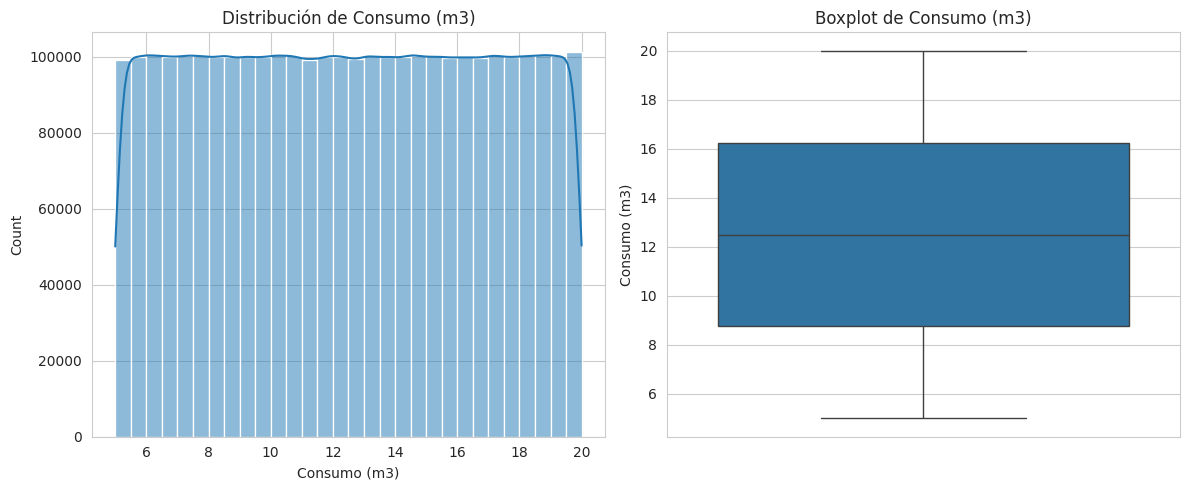

Estadísticas para Consumo (m3):
count    3.000000e+06
mean     1.250052e+01
std      4.332481e+00
min      5.000000e+00
25%      8.750000e+00
50%      1.250000e+01
75%      1.625000e+01
max      2.000000e+01
Name: Consumo (m3), dtype: float64



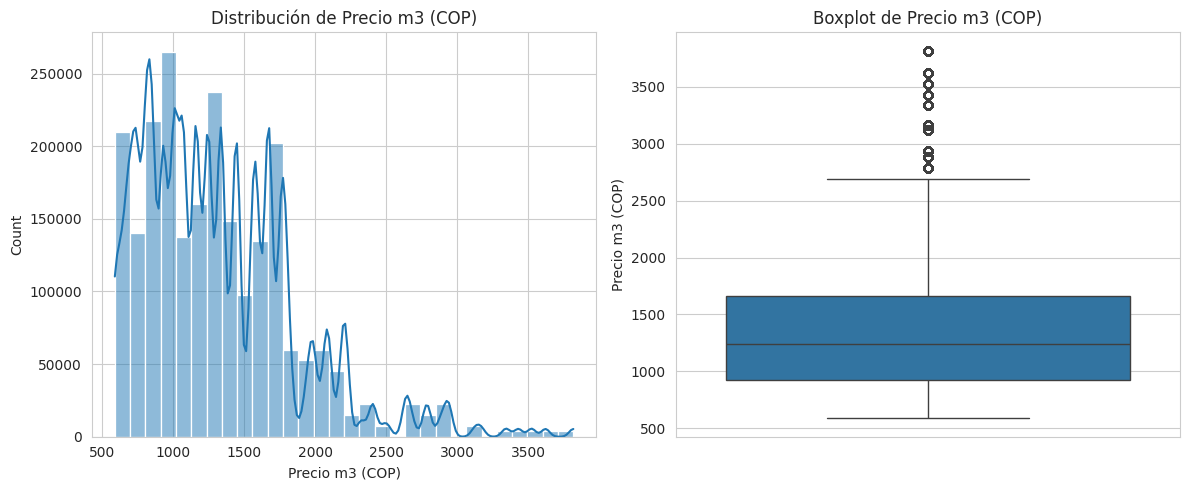

Estadísticas para Precio m3 (COP):
count    2.300000e+06
mean     1.318233e+03
std      5.461445e+02
min      5.880000e+02
25%      9.230000e+02
50%      1.240000e+03
75%      1.663000e+03
max      3.816000e+03
Name: Precio m3 (COP), dtype: float64



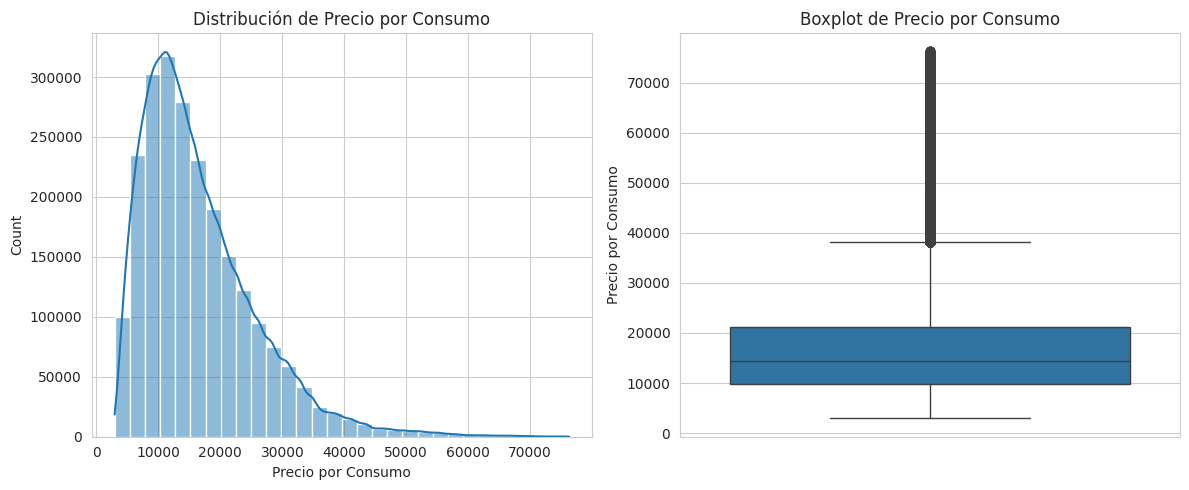

Estadísticas para Precio por Consumo:
count    2.300000e+06
mean     1.647949e+04
std      9.214822e+03
min      2.940000e+03
25%      9.788380e+03
50%      1.437359e+04
75%      2.110142e+04
max      7.628184e+04
Name: Precio por Consumo, dtype: float64



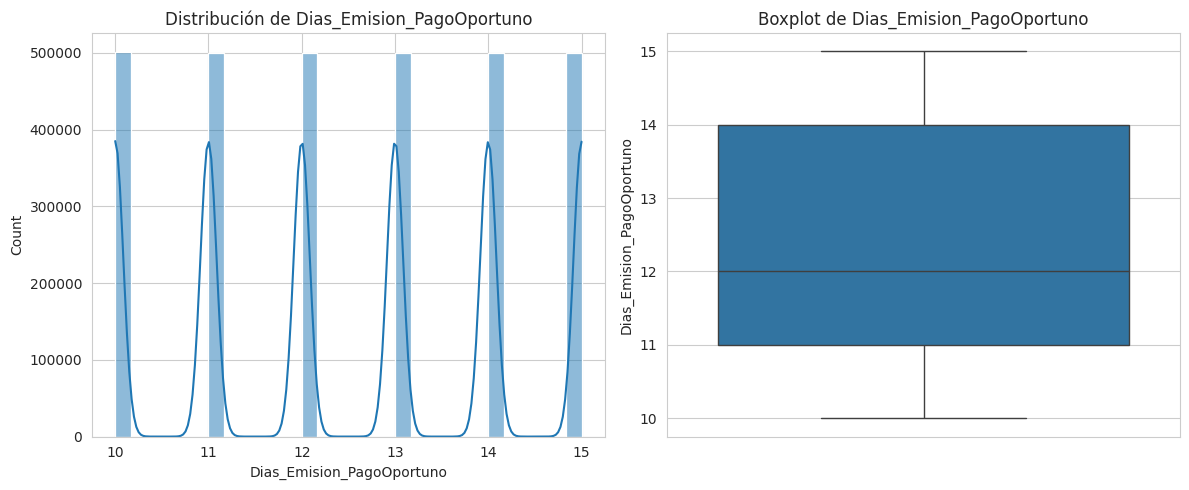

Estadísticas para Dias_Emision_PagoOportuno:
count    3.000000e+06
mean     1.249903e+01
std      1.708239e+00
min      1.000000e+01
25%      1.100000e+01
50%      1.200000e+01
75%      1.400000e+01
max      1.500000e+01
Name: Dias_Emision_PagoOportuno, dtype: float64



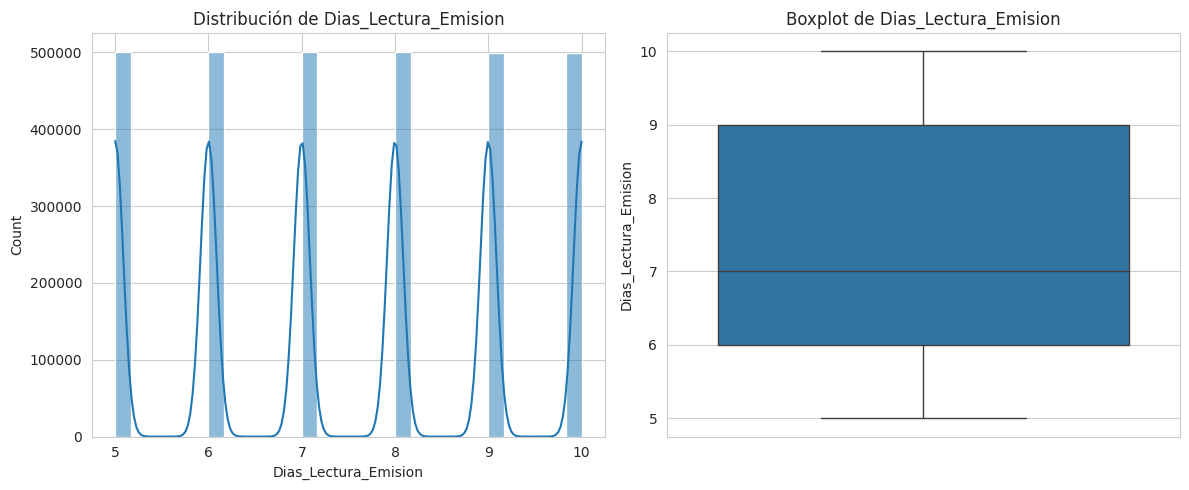

Estadísticas para Dias_Lectura_Emision:
count    3.000000e+06
mean     7.498845e+00
std      1.707785e+00
min      5.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: Dias_Lectura_Emision, dtype: float64



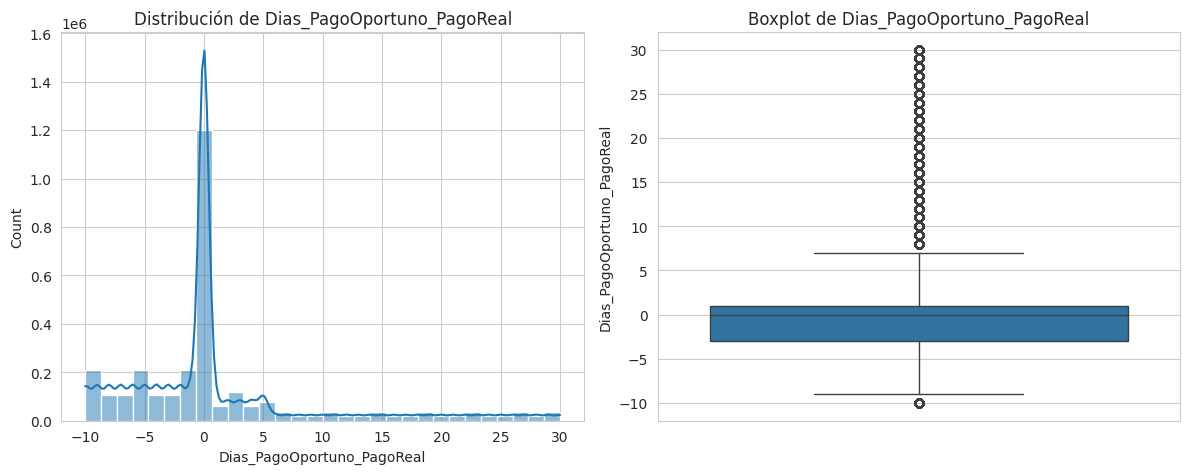

Estadísticas para Dias_PagoOportuno_PagoReal:
count    3.000000e+06
mean     1.004112e+00
std      8.246973e+00
min     -1.000000e+01
25%     -3.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.000000e+01
Name: Dias_PagoOportuno_PagoReal, dtype: float64



In [19]:
numerical_cols_to_plot = ['Consumo (m3)', 'Precio m3 (COP)', 'Precio por Consumo',
                           'Dias_Emision_PagoOportuno', 'Dias_Lectura_Emision', 'Dias_PagoOportuno_PagoReal']

for col in numerical_cols_to_plot:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_analisis[col].dropna(), kde=True, bins=30) # dropna() para evitar errores con NaT/NaN en histplot
    plt.title(f'Distribución de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_analisis[col].dropna())
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()
    print(f"Estadísticas para {col}:\n{df_analisis[col].describe()}\n")

**Interpretación de distribuciones:**
* **Consumo (m3):** Observar la forma de la distribución. ¿Es simétrica, sesgada? ¿Hay outliers (consumos muy altos o bajos)?
* **Precio m3 (COP):** ¿Varía mucho? Esto dependerá de los estratos y la evolución temporal.
* **Precio por Consumo:** Similar al consumo, pero escalado por el precio.
* **Variables de Días:**
    * `Dias_Emision_PagoOportuno`: Plazo para pagar. ¿Es constante?
    * `Dias_Lectura_Emision`: Tiempo entre lectura y emisión. ¿Es consistente?
    * `Dias_PagoOportuno_PagoReal`: Valores positivos indican mora. Negativos, pago adelantado. Cero, pago el día oportuno. La alta concentración en valores negativos o cero en el head del notebook original sugiere pagos puntuales o adelantados para esos casos. El boxplot puede mostrar la magnitud de la mora o adelanto.

### 5.3 Distribución de Variables Categóricas Clave

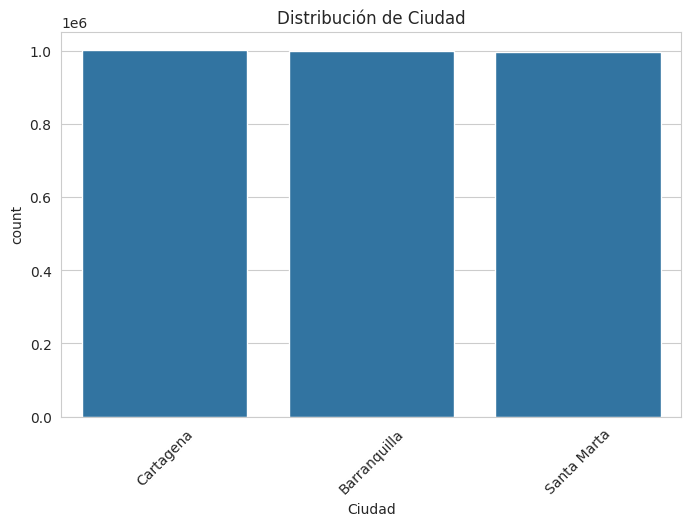

Conteo para Ciudad:
Ciudad
Cartagena       1002300
Barranquilla    1000200
Santa Marta      997500
Name: count, dtype: int64



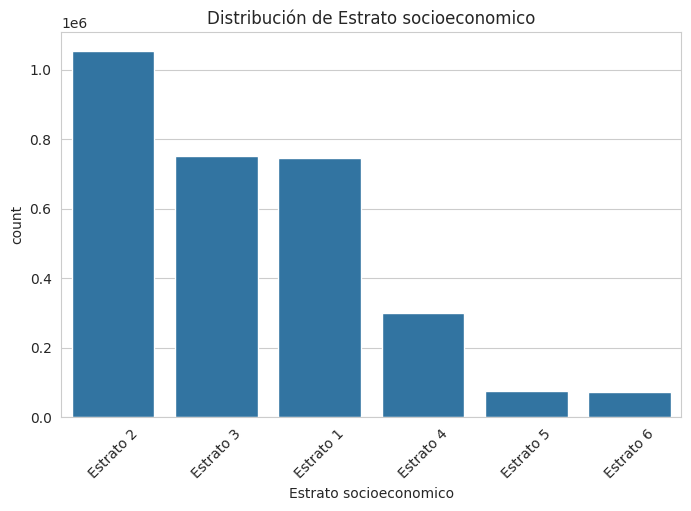

Conteo para Estrato socioeconomico:
Estrato socioeconomico
Estrato 2    1055100
Estrato 3     751140
Estrato 1     745320
Estrato 4     300720
Estrato 5      75240
Estrato 6      72480
Name: count, dtype: int64



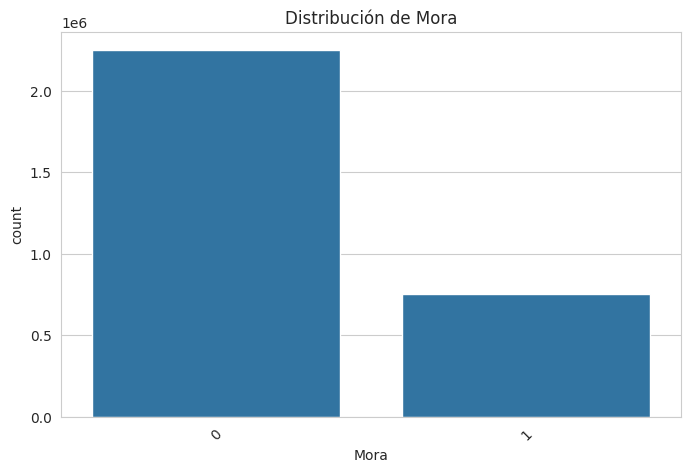

Conteo para Mora:
Mora
0    2249271
1     750729
Name: count, dtype: int64



In [20]:
categorical_cols_to_plot = ['Ciudad', 'Estrato socioeconomico', 'Mora']

for col in categorical_cols_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_analisis, x=col, order=df_analisis[col].value_counts(dropna=False).index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    print(f"Conteo para {col}:\n{df_analisis[col].value_counts(dropna=False)}\n")

**Interpretación de distribuciones categóricas:**
* **Ciudad:** ¿Cómo se distribuyen las facturas/clientes por ciudad?
* **Estrato socioeconomico:** ¿Qué estratos son los más comunes?
* **Mora:** ¿Qué proporción de facturas se pagan con mora?

### 5.4 Análisis de Correlación (Variables Numéricas)

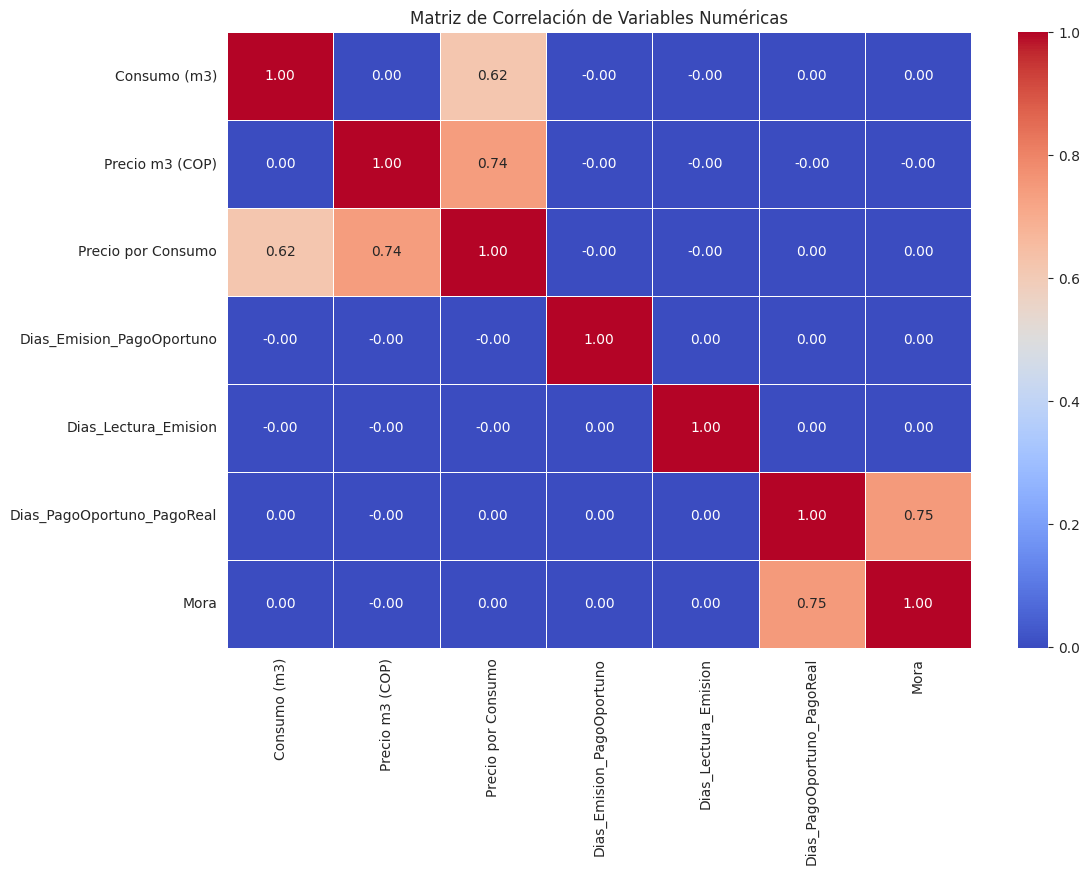


--- Pares con mayor correlación (absoluta) ---
Dias_PagoOportuno_PagoReal  Mora                  0.749306
Precio m3 (COP)             Precio por Consumo    0.741759
Precio por Consumo          Consumo (m3)          0.620050
dtype: float64


In [21]:
numerical_df = df_analisis.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

print("\n--- Pares con mayor correlación (absoluta) ---")
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
unique_corr_pairs = sorted_pairs[(abs(sorted_pairs) < 1) & (abs(sorted_pairs) > 0.5)].drop_duplicates() # Filtrar > 0.5 para relevancia
print(unique_corr_pairs.head(10))

**Interpretación de la Matriz de Correlación:**
* Busca coeficientes de correlación cercanos a 1 (correlación positiva fuerte) o -1 (correlación negativa fuerte).
* Por ejemplo, es esperable una alta correlación entre `Consumo (m3)` y `Precio por Consumo`.
* Correlaciones inesperadas pueden revelar insights interesantes.

### 5.5 Relaciones entre Variables

Exploremos algunas relaciones específicas.

#### 5.5.1 Consumo promedio por Estrato y Ciudad

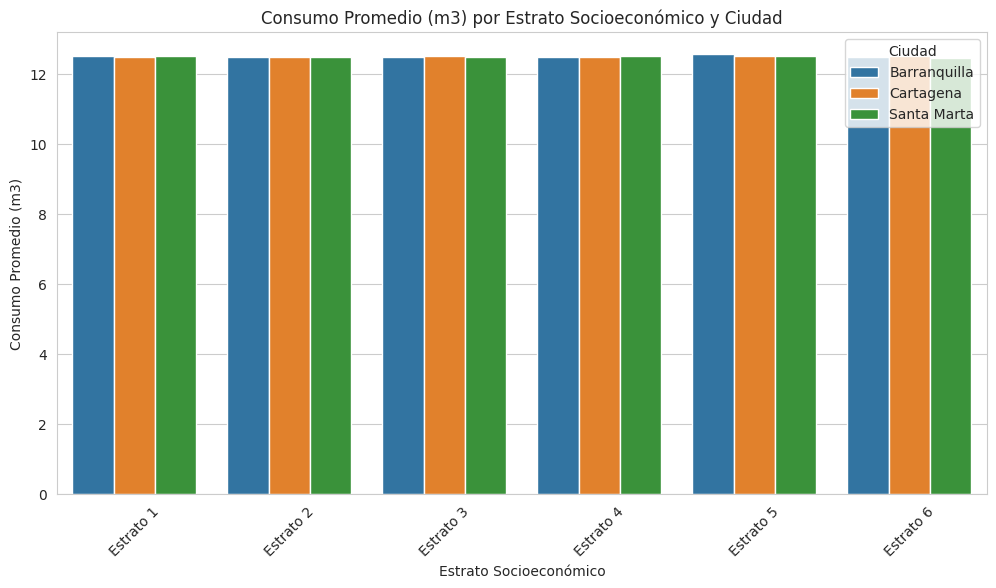

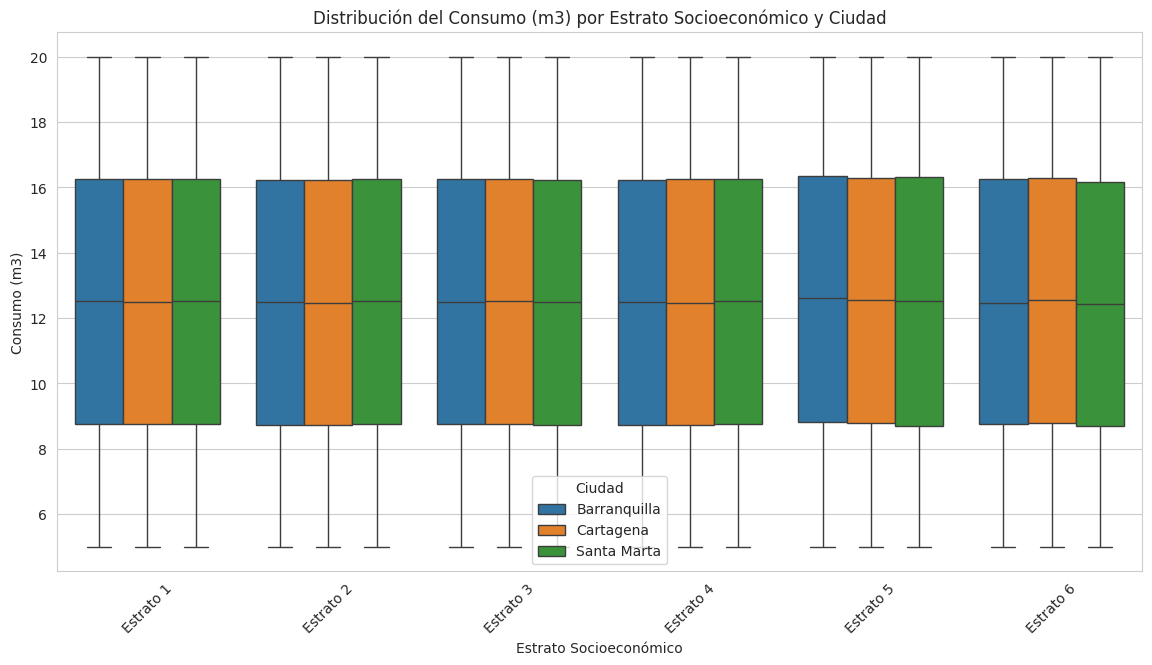

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_analisis, x='Estrato socioeconomico', y='Consumo (m3)', hue='Ciudad', estimator=pd.Series.mean, errorbar=None, order=sorted(df_analisis['Estrato socioeconomico'].dropna().unique()))
plt.title('Consumo Promedio (m3) por Estrato Socioeconómico y Ciudad')
plt.ylabel('Consumo Promedio (m3)')
plt.xlabel('Estrato Socioeconómico')
plt.xticks(rotation=45)
plt.legend(title='Ciudad')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_analisis, x='Estrato socioeconomico', y='Consumo (m3)', hue='Ciudad', order=sorted(df_analisis['Estrato socioeconomico'].dropna().unique()))
plt.title('Distribución del Consumo (m3) por Estrato Socioeconómico y Ciudad')
plt.ylabel('Consumo (m3)')
plt.xlabel('Estrato Socioeconómico')
plt.xticks(rotation=45)
plt.legend(title='Ciudad')
plt.show()

#### 5.5.2 Tasa de Mora por Estrato y Ciudad

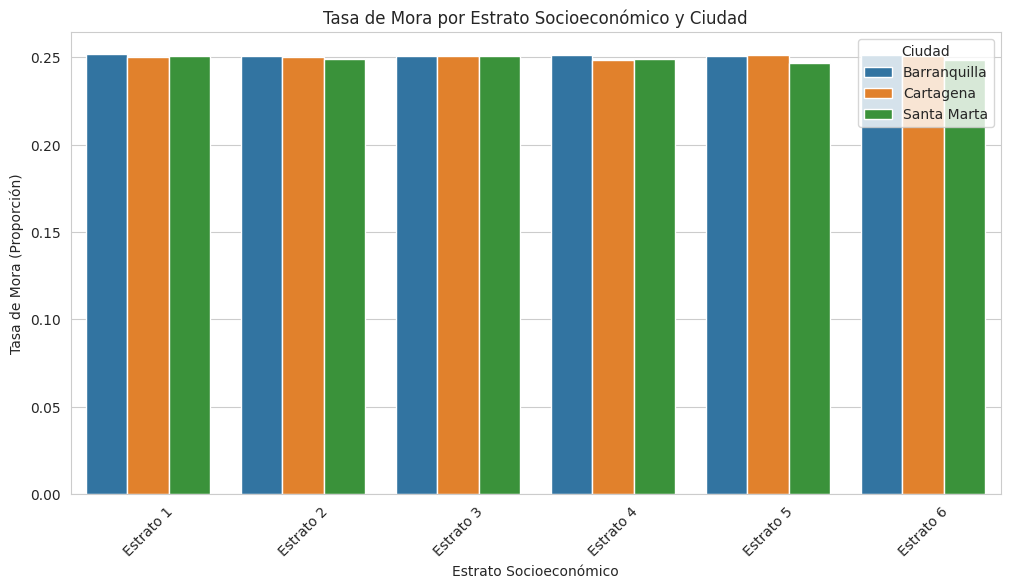

In [23]:
mora_por_estrato_ciudad = df_analisis.groupby(['Estrato socioeconomico', 'Ciudad'])['Mora'].mean().reset_index()
mora_por_estrato_ciudad = mora_por_estrato_ciudad.rename(columns={'Mora': 'Tasa de Mora'})

plt.figure(figsize=(12, 6))
sns.barplot(data=mora_por_estrato_ciudad, x='Estrato socioeconomico', y='Tasa de Mora', hue='Ciudad', order=sorted(mora_por_estrato_ciudad['Estrato socioeconomico'].dropna().unique()))
plt.title('Tasa de Mora por Estrato Socioeconómico y Ciudad')
plt.ylabel('Tasa de Mora (Proporción)')
plt.xlabel('Estrato Socioeconómico')
plt.xticks(rotation=45)
plt.legend(title='Ciudad')
plt.show()

### 5.6 Análisis Temporal (Ejemplo: Consumo a lo largo del tiempo)

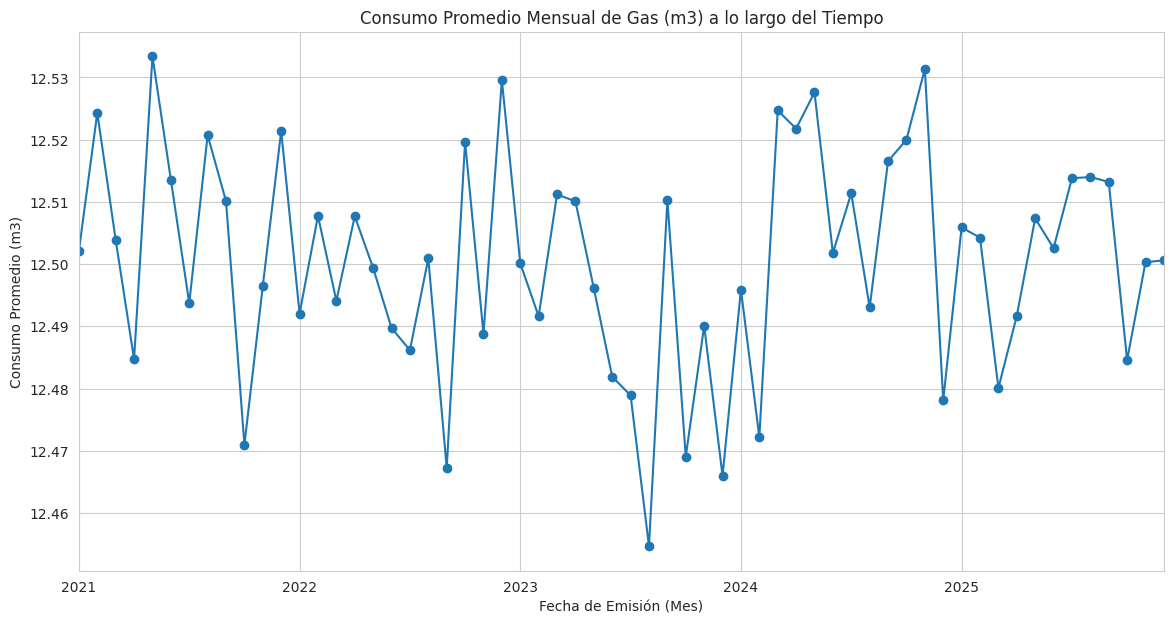

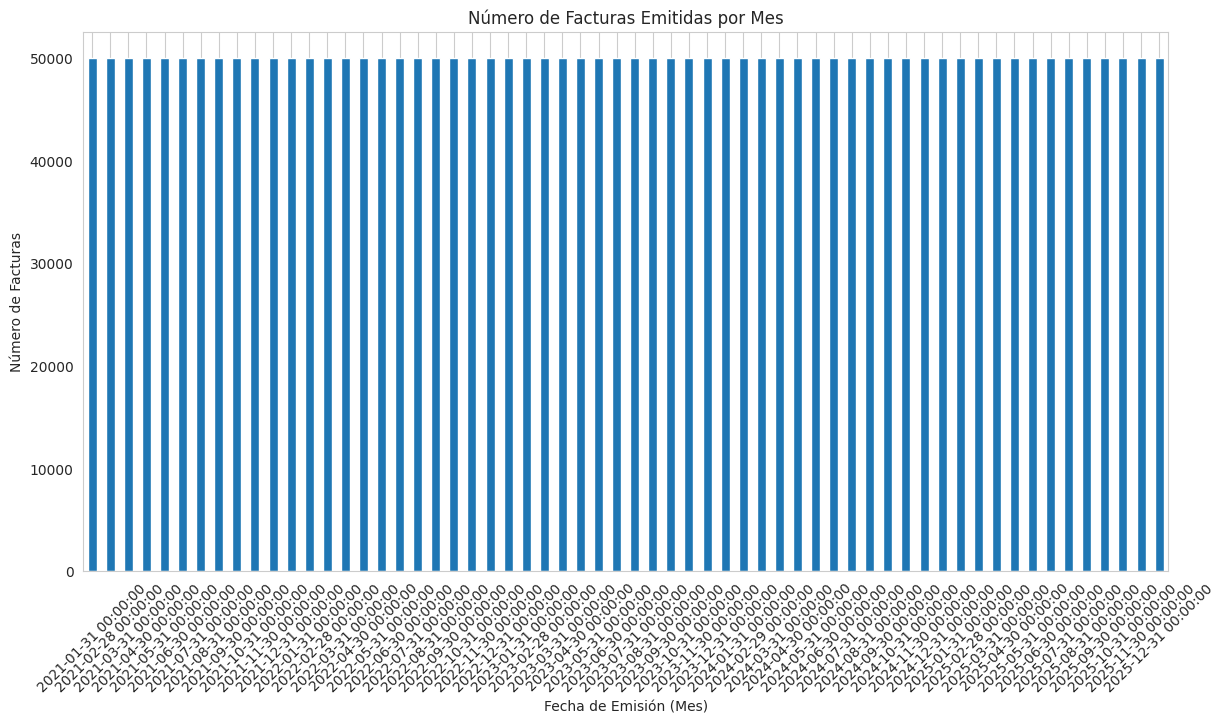

In [24]:
df_temporal = df_analisis.set_index('Fecha de Emision').sort_index()

consumo_mensual = df_temporal['Consumo (m3)'].resample('ME').mean()

plt.figure(figsize=(14, 7))
consumo_mensual.plot(marker='o', linestyle='-')
plt.title('Consumo Promedio Mensual de Gas (m3) a lo largo del Tiempo')
plt.xlabel('Fecha de Emisión (Mes)')
plt.ylabel('Consumo Promedio (m3)')
plt.grid(True)
plt.show()

facturas_mensuales = df_temporal.resample('ME').size()
plt.figure(figsize=(14, 7))
facturas_mensuales.plot(kind='bar')
plt.title('Número de Facturas Emitidas por Mes')
plt.xlabel('Fecha de Emisión (Mes)')
plt.ylabel('Número de Facturas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Interpretación del Análisis Temporal:**
* ¿Hay tendencias en el consumo (aumento, disminución)?
* ¿Se observa estacionalidad (picos en ciertos meses)?
* La cantidad de facturas puede indicar crecimiento de la base de clientes o fluctuaciones en la facturación.

## Fase 6: Conclusiones de la Exploración y Próximos Pasos

En esta fase exploratoria, hemos:
1.  Cargado y realizado una inspección inicial de cuatro fuentes de datos.
2.  Combinado los datos en un DataFrame unificado (`df_analisis`).
3.  Identificado y manejado filas duplicadas que surgieron durante los merges.
4.  Realizado ingeniería de características, creando nuevas variables como `Precio por Consumo`, diferencias temporales y un indicador de `Mora`.
5.  Explorado las distribuciones de variables numéricas y categóricas clave.
6.  Analizado correlaciones y relaciones entre variables (e.g., consumo por estrato, mora por estrato).
7.  Realizado un breve análisis temporal del consumo.